In [95]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [145]:
# constants
logsRootPath = '../out/build/x64-Release/output/'
logs1NamePrefix = 'RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32'
logs2NamePrefix = 'RelativeL2Luminance_Adam_0.010000_0.990000_0_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32'
legendLabels = ['Loss (Original) Pos+Dir', 'Loss Pos+Dir+Dens']
featureList = ["frame", "MSE", "rBias", "StdDev", "Loss"]
maxFrameCount = 200

In [111]:
def ParseData(logsNamePrefix: str) -> pd.DataFrame:
    df = pd.DataFrame(0, index=np.arange(maxFrameCount), columns=featureList) 
    suitableLogCounter = 0
    
    logsDirs = os.listdir(logsRootPath)
    
    # average collected data between different runs
    for dir in logsDirs:
        if logsNamePrefix in dir:
            #print('Found suitable log folder {}'.format(dir))
            tempDf = pd.read_csv('{}{}/logNrc.txt'.format(logsRootPath, dir), sep=" ", header=None)
            tempDf.columns = featureList
            tempDf = tempDf[:maxFrameCount]
            df = df.add(tempDf, fill_value=0)
            suitableLogCounter += 1
    
    print('[{}] suitable log count found: {}'.format(logsNamePrefix, suitableLogCounter))
    
    if suitableLogCounter > 0:
        df = df.div(suitableLogCounter)

    return df

In [112]:
df1 = ParseData(logs1NamePrefix)
df2 = ParseData(logs2NamePrefix)

[RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32] suitable log count found: 10
[RelativeL2Luminance_Adam_0.010000_0.990000_0_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32] suitable log count found: 10


In [143]:
def ComparePlotDataframes(df1: pd.DataFrame, df2: pd.DataFrame, legendLabels: list):
    ax = df1.plot.line(x='frame', y='Loss')
    df2.plot.line(ax=ax, x='frame', y='Loss')
    ax.legend(legendLabels)
    
    ax = df1[:100].plot.line(x='frame', y='Loss')
    df2[:100].plot.line(ax=ax, x='frame', y='Loss')
    ax.legend(legendLabels)
    
    ax = df1.plot.line(x='frame', y='Loss')
    df2.plot.line(ax=ax, x='frame', y='Loss', logy='sym')
    ax.legend(legendLabels)

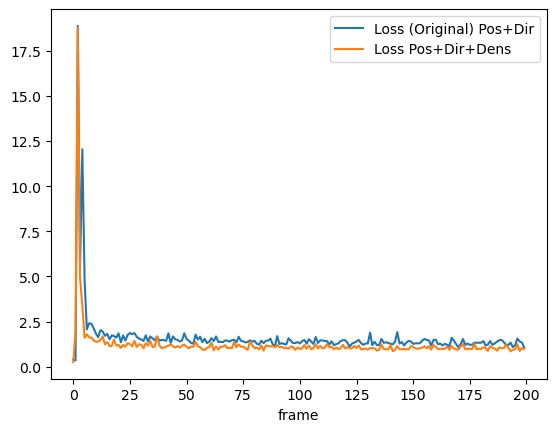

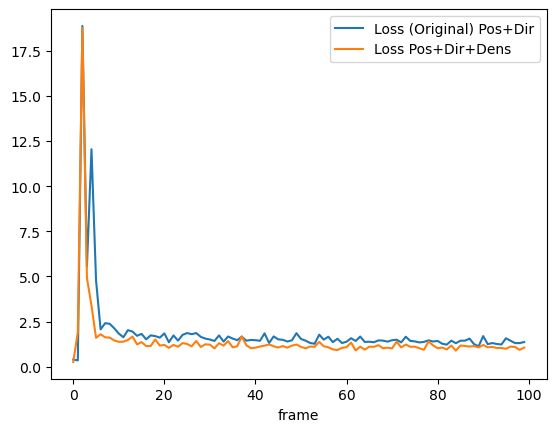

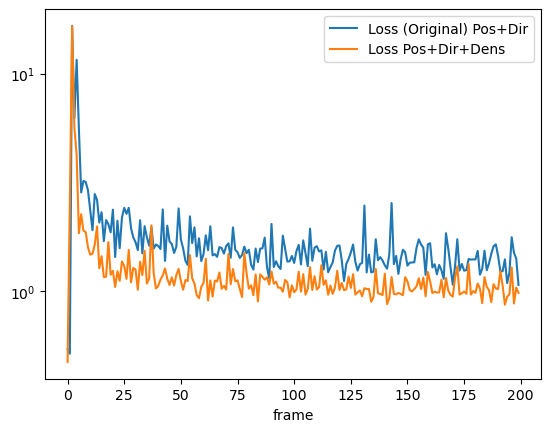

In [146]:
ComparePlotDataframes(df1, df2, legendLabels)